In [289]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy

In [290]:
data = pd.read_csv('/creditcard.csv', on_bad_lines='skip')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [291]:
data['Class']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
5969    0.0
5970    0.0
5971    0.0
5972    0.0
5973    NaN
Name: Class, Length: 5974, dtype: float64

In [292]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

EXPLORATRY DATA ANAYLYSIS

In [293]:
data.isnull().values.any()

True

Text(0, 0.5, 'frequencies')

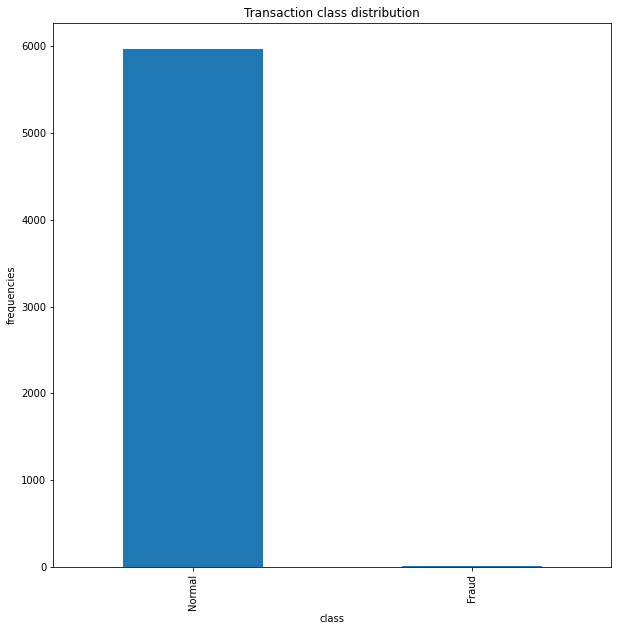

In [294]:
count_class = pd.value_counts(data['Class'])
count_class.plot(kind = 'bar',figsize=  (10,10))
plt.title("Transaction class distribution")
plt.xticks(range(2),["Normal","Fraud"])
plt.xlabel("class")
plt.ylabel("frequencies")

In [295]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
fraud.shape


(3, 31)

In [296]:
normal.shape

(5970, 31)

In [297]:
# We need to analyze more amount of information from the transaction data
#How different are the amount of money used in different transaction classes?
fraud.Amount.describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [298]:
normal.Amount.describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

In [299]:
#plot 
normal.Amount

0       149.62
1         2.69
2       378.66
3       123.50
4        69.99
         ...  
5968      5.00
5969    458.92
5970      0.77
5971     14.00
5972    139.90
Name: Amount, Length: 5970, dtype: float64

In [300]:
fraud.Amount.max(
    
)

529.0

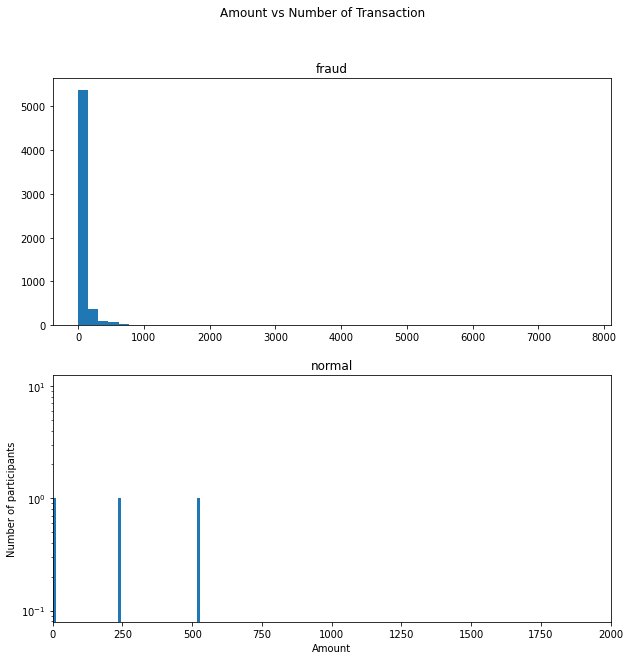

In [301]:
fig,(ax1,ax2)= plt.subplots(2,figsize=(10,10))
fig.suptitle("Amount vs Number of Transaction")
ax1.hist(normal.Amount,bins=50)
ax1.set_title('fraud')
ax2.hist(fraud.Amount,bins =50)
ax2.set_title('normal')
plt.xlabel("Amount")
plt.xlim(0,2000)
plt.yscale('log')
plt.ylabel("Number of participants")
plt.show()


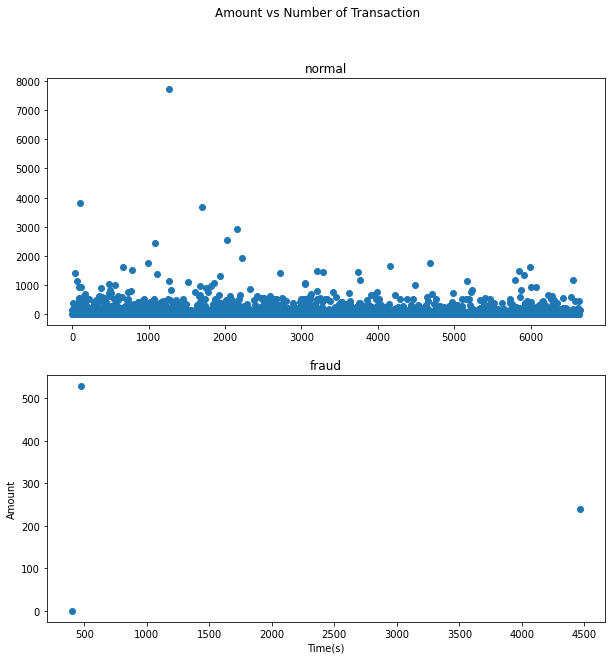

In [302]:
fig,(ax1,ax2)= plt.subplots(2,figsize=(10,10))
fig.suptitle("Amount vs Number of Transaction")
ax1.scatter(normal.Time,normal.Amount)
ax1.set_title('normal')
ax2.scatter(fraud.Time,fraud.Amount)
ax2.set_title('fraud')
plt.xlabel("Time(s)")
plt.ylabel("Amount")
plt.show()


In [303]:
## Take some sample of the data
# Determine number of normal and fraud dataset iin data1
data1 = data.sample(frac=0.1,random_state=1)
data1.shape

(597, 31)

In [304]:
outlier_fraction = len(fraud)/float(len(normal))

In [305]:
fraud = data1[data1["Class"]==1]
normal = data1[data1["Class"]==0]


In [306]:
print(outlier_fraction)

0.0005025125628140704


In [307]:
print("Fraud Cases: {}".format(len(fraud)))
print("Valid Cases:{}".format(len(normal)))

Fraud Cases: 1
Valid Cases:596


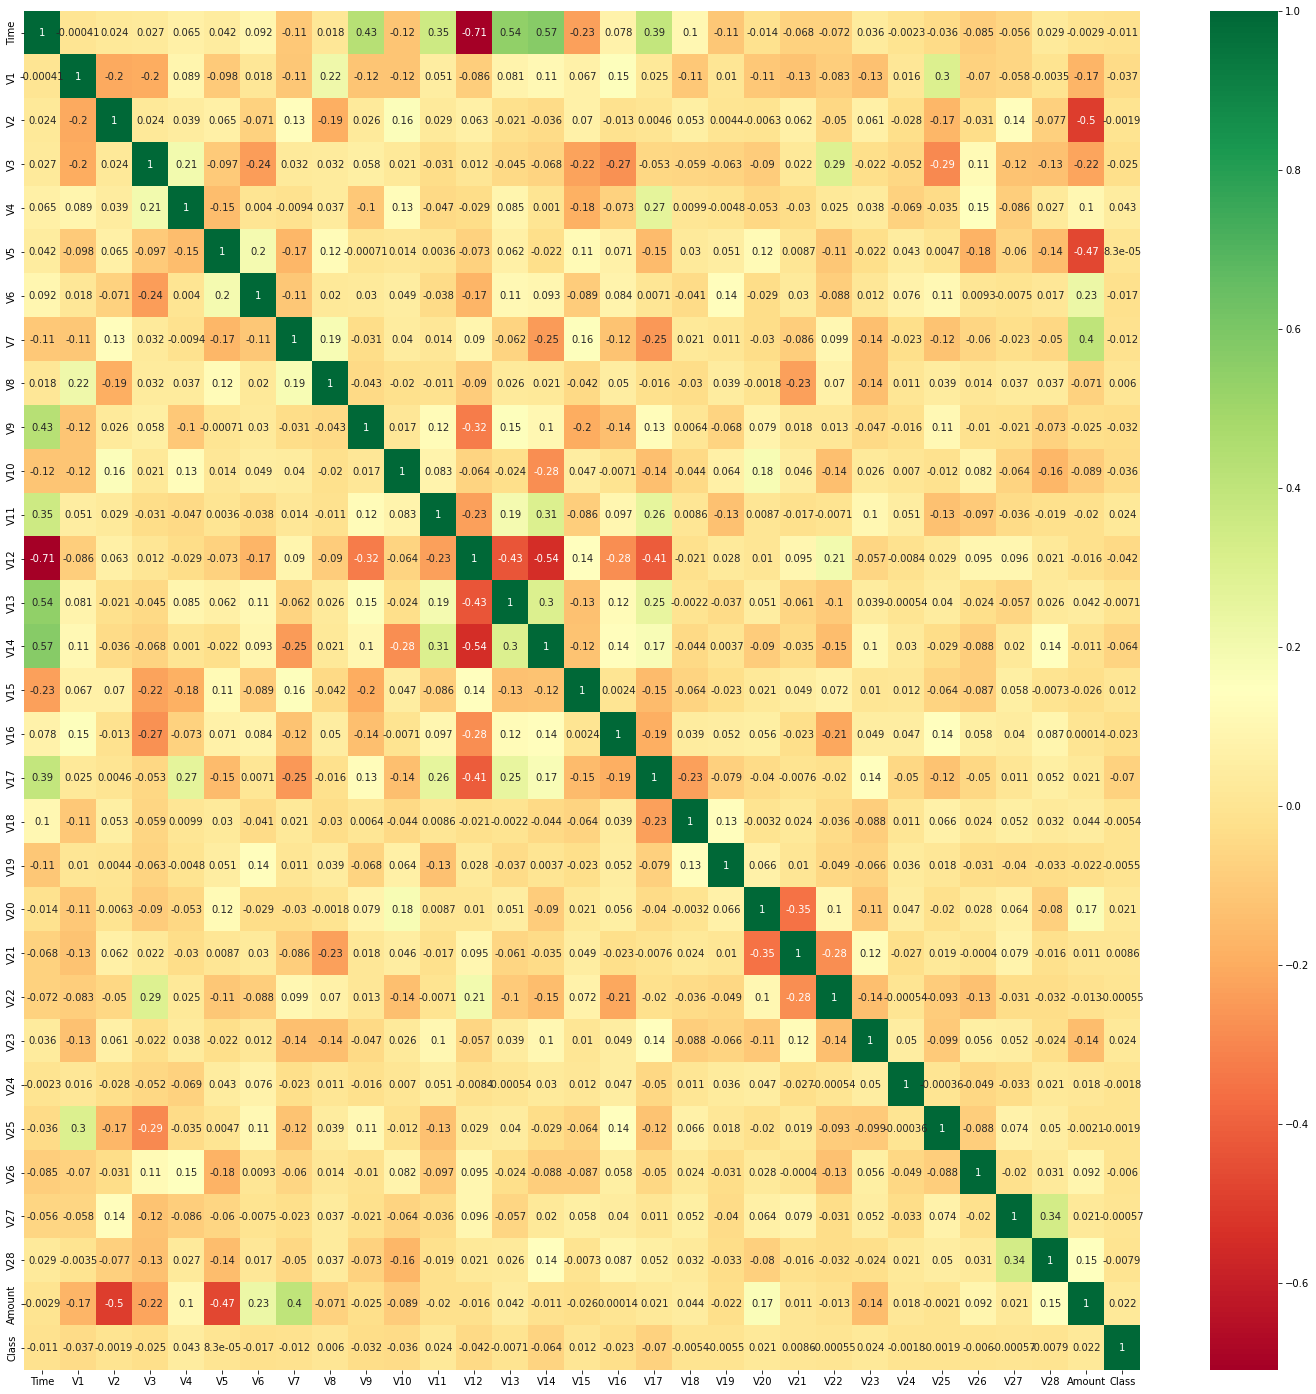

In [308]:
#correlation
#get corelation of each feature in dataset
corrmat = data1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(25,25))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



In [309]:
#Create independent and Dependent Features
columns = data1.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["Class"]]
# Store the variable we are predicting 
target = "Class"
# Define a random state 
state = np.random.RandomState(42)
X = data1[columns]
Y = data1[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)


(597, 30)
(597,)



**Model Prediction**

Now it is time to start building the model .we are going to  try three models and choose which model is best.

One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation.
Local Outlier Factor(LOF) Algorithm

The LOF algorithm is an unsupervised outlier detection method which computes the local density deviation of a given data point with respect to its neighbors. It considers as outlier samples that have a substantially lower density than their neighbors.

The number of neighbors considered, (parameter n_neighbors) is typically chosen 1) greater than the minimum number of objects a cluster has to contain, so that other objects can be local outliers relative to this cluster, and 2) smaller than the maximum number of close by objects that can potentially be local outliers. In practice, such informations are generally not available, and taking n_neighbors=20 appears to work well in general.


In [310]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

In [311]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=10, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0),
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=10, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine":OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05, 
                                          max_iter=-1)
   
}



In [312]:
X= X.fillna(0)
Y = Y.dropna(0)
Y.shape
X.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of Series.dropna will be keyword-only
  


(597, 30)

In [313]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        ypred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    elif clf_name == "Support Vector Machine":
        clf.fit(X)
        ypred = clf.predict(X)
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        ypred = clf.predict(X)
  

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [314]:
ypred.shape

(597,)

In [315]:
ypred[ypred==1]=0
ypred[ypred==-1]=1
nerrors= (ypred != Y).sum()#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions

In [316]:
#Run classification Matrics
print("{}: {}".format(clf_name,nerrors))
print("Accuracy Score :")
print(accuracy_score(Y,ypred))
print("Classification Report :")
print(classification_report(Y,ypred))


Support Vector Machine: 243
Accuracy Score :
0.592964824120603
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      0.59      0.74       596
         1.0       0.00      0.00      0.00         1

    accuracy                           0.59       597
   macro avg       0.50      0.30      0.37       597
weighted avg       1.00      0.59      0.74       597



In [329]:
##Define the outlier detection methods

classifiers = {
    "Local Outlier Factor":LocalOutlierFactor(n_neighbors=5, algorithm='auto', 
                                              leaf_size=30, metric='minkowski',
                                              p=2, metric_params=None, contamination=outlier_fraction),
    
   
}



In [330]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        ypred = clf.fit_predict(X)
        scores_prediction = clf.negative_outlier_factor_
    else:    
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        ypred = clf.predict(X)
ypred[ypred==1]=0
ypred[ypred==-1]=1
nerrors= (ypred != Y).sum()#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
#Run classification Matrics
print("{}: {}".format(clf_name,nerrors))
print("Accuracy Score :")
print(accuracy_score(Y,ypred))
print("Classification Report :")
print(classification_report(Y,ypred))


Local Outlier Factor: 2
Accuracy Score :
0.9966499162479062
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       596
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       597
   macro avg       0.50      0.50      0.50       597
weighted avg       1.00      1.00      1.00       597



In [325]:
##Define the outlier detection methods

classifiers = {
    "Isolation Forest":IsolationForest(n_estimators=100, max_samples=len(X), 
                                       contamination=outlier_fraction,random_state=state, verbose=0)
    
   
}



In [327]:
n_outliers = len(fraud)
for i, (clf_name,clf) in enumerate(classifiers.items()):
    #Fit the data and tag outliers  
        clf.fit(X)
        scores_prediction = clf.decision_function(X)
        ypred = clf.predict(X)
ypred[ypred==1]=0
ypred[ypred==-1]=1
nerrors= (ypred != Y).sum()#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions
#Run classification Matrics
print("{}: {}".format(clf_name,nerrors))
print("Accuracy Score :")
print(accuracy_score(Y,ypred))
print("Classification Report :")
print(classification_report(Y,ypred))


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


Isolation Forest: 2
Accuracy Score :
0.9966499162479062
Classification Report :
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       596
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00       597
   macro avg       0.50      0.50      0.50       597
weighted avg       1.00      1.00      1.00       597



  1.  isolation Forest detected 2 errors versus Local Outlier Factor detecting 2 errors vs. SVM detecting 243 errors
  2.  Isolation Forest and local outlier factor showing same accuracy but generally isolation forest is better and svm have accuracy of 59.29%.
  3. We can also improve on this accuracy by increasing the sample size or use deep learning algorithms however at the cost of computational expense.We can also use complex anomaly detection models to get better accuracy in determining more fraudulent cases


 

